In [1]:
import genophenocorr
import hpotk
from IPython.display import display, HTML
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

/Users/robin/PycharmProjects/genophenocorr/gpc_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


In [2]:
ANKRD11_id = 'NM_013275.6' # MANE select
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder

fpath_phenopackets = '/Users/robin/GIT/phenopacket-store/notebooks/ANKRD11/phenopackets'
cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)


Patients Created: 100%|██████████| 337/337 [00:00<00:00, 460.72it/s]
Validated under none policy
Showing errors and warnings
337 phenopacket(s) found at `/Users/robin/GIT/phenopacket-store/notebooks/ANKRD11/phenopackets`
  patient #0
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Novara, 2017_P2[PMID_36446582_Novara_2017_P2]. Remove variant from testing
     ·Patient PMID_36446582_Novara_2017_P2 has no variants to work with
  patient #1
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Goldenberg2016_P13[PMID_36446582_Goldenberg2016_P13]. Remove variant from testing
     ·Patient PMID_36446582_Goldenberg2016_P13 has no variants to work with
  patient #3
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Ock

In [3]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
#analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [4]:
from genophenocorr.model import VariantEffect

frameshift = analysis.compare_by_variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=ANKRD11_id)
frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_013275.6                      Yes             No  \
                                                     Count Percent  Count   
Abnormality of the hand [HP:0001155]                95/144     66%  60/71   
EEG abnormality [HP:0002353]                          7/33     21%   9/16   
Feeding difficulties [HP:0011968]                    33/89     37%  26/45   
Low anterior hairline [HP:0000294]                   40/58     69%  15/30   
Intellectual disability [HP:0001249]                99/119     83%  59/64   
...                                                    ...     ...    ...   
Abnormality of the philtrum [HP:0000288]             66/66    100%  38/38   
Abnormality of central nervous system electroph...     7/7    100%    9/9   
Abnormality of reproductive system physiology [...   20/20    100%  15/15   
Abnormal pinna morphology [HP:0000377]               37/37    100%  18/18   
Abnormal ventricular septum morphology [HP:0010...     9/9    100%    3/3   

FRAMESHIFT_VARIANT on NM_013275.6                                     \
                                                   Percent   p value   
Abnormality of the hand [HP:0001155]                   85%  0.005661   
EEG abnormality [HP:0002353]                           56%  0.022884   
Feeding difficulties [HP:0011968]                      58%  0.027584   
Low anterior hairline [HP:0000294]                     50%  0.105274   
Intellectual disability [HP:0001249]                   92%  0.115195   
...                                                    ...       ...   
Abnormality of the philtrum [HP:0000288]              100%  1.000000   
Abnormality of central nervous system electroph...    100%  1.000000   
Abnormality of reproductive system physiology [...    100%  1.000000   
Abnormal pinna morphology [HP:0000377]                100%  1.000000   
Abnormal ventricular septum morphology [HP:0010...    100%  1.000000   

FRAMESHIFT_VARIANT on NM_013275.6                                     
                                                   Corrected p value  
Abnormality of the hand [HP:0001155]                             1.0  
EEG abnormality [HP:0002353]                                     1.0  
Feeding difficulties [HP:0011968]                                1.0  
Low anterior hairline [HP:0000294]                               1.0  
Intellectual disability [HP:0001249]                             1.0  
...                                                              ...  
Abnormality of the philtrum [HP:0000288]                         1.0  
Abnormality of central nervous system electroph...               1.0  
Abnormality of reproductive system physiology [...               1.0  
Abnormal pinna morphology [HP:0000377]                           1.0  
Abnormal ventricular septum morphology [HP:0010...               1.0  

[190 rows x 6 columns]

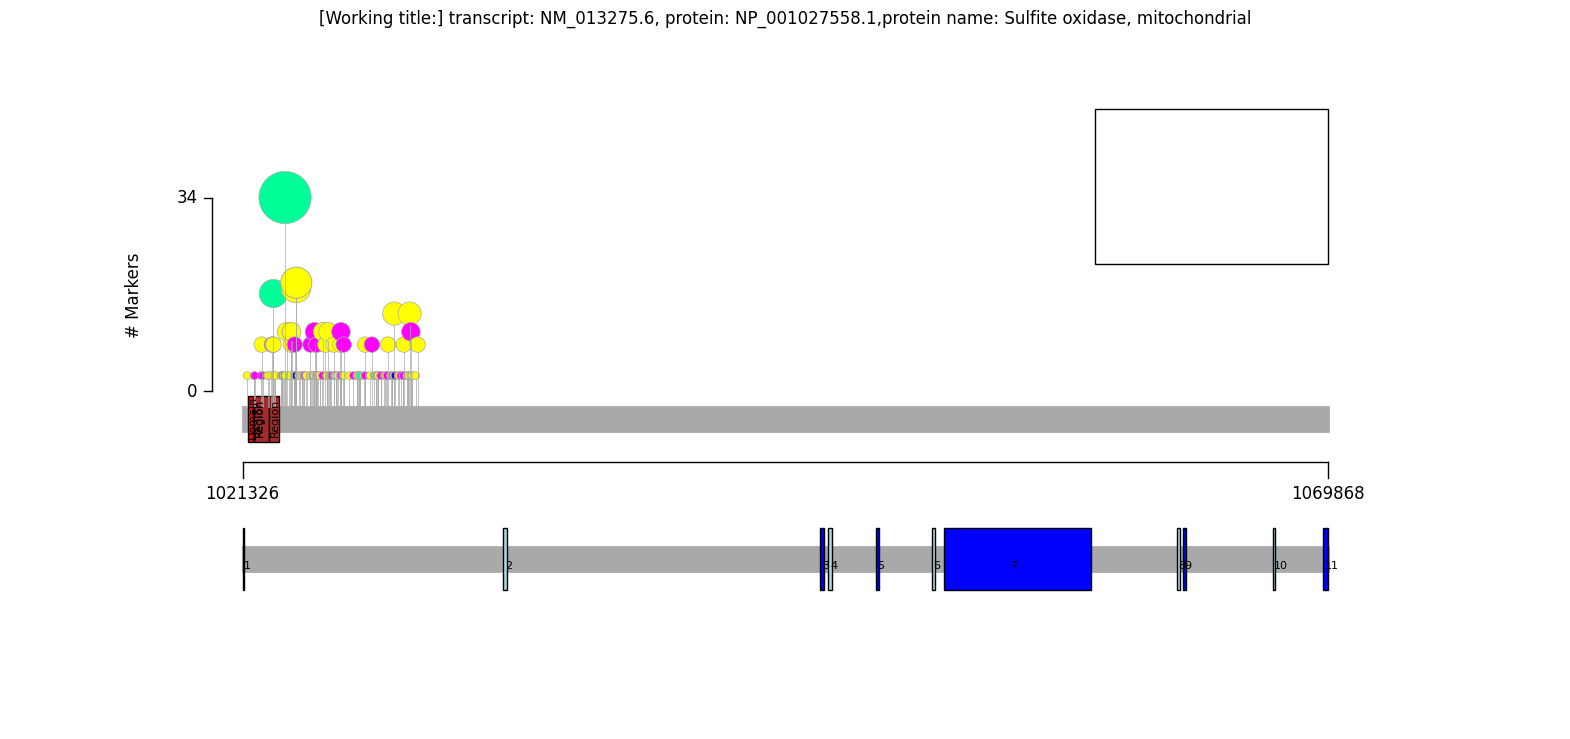

In [6]:
protein_id = 'NP_001027558.1'
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(protein_id)


from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(ANKRD11_id)


assert len(protein_metas) == 1
protein_meta = protein_metas[0]
from genophenocorr.view._draw_variants import VariantsVisualizer
viz = VariantsVisualizer()
viz.draw_fig(tx_coordinates, protein_meta, cohort)

In [ ]:
import pandas as pd

In [ ]:
from genophenocorr.model import VariantEffect
effect = VariantEffect.MISSENSE_VARIANT
yes = PatientCategories.YES
no = PatientCategories.NO
#GenotypeBooleanPredicate.YES, GenotypeBooleanPredicate.NO

df = pd.DataFrame({PatientCategories.YES: [0, 2], PatientCategories.NO: [11, 6]})


In [ ]:
df